# 七日课 大作业：实现超分

经过这几天的学习，相信大家对GAN已经有了一定的了解了，也在前面的作业中体验过GAN的一些应用了。那现在大家是不是想要升级一下难度，自己动手来训练一个模型呢？

需要自己动手训练的大作业来啦，大作业内容为基于PaddleGAN中的超分模型，实现卡通画超分。


## 安装PaddleGAN

PaddleGAN的安装目前支持Clone GitHub和Gitee两种方式：

In [ ]:
# 安装ppgan
# 当前目录在: /home/aistudio/, 这个目录也是左边文件和文件夹所在的目录
# 克隆最新的PaddleGAN仓库到当前目录
# !git clone https://github.com/PaddlePaddle/PaddleGAN.git
# 如果从github下载慢可以从gitee clone：
!git clone https://gitee.com/paddlepaddle/PaddleGAN.git
# 安装Paddle GAN
%cd PaddleGAN/
!pip install -v -e .

     |█████████████████▏              | 8.2MB 12.1MB/s eta 0:00:01

### 数据准备
我们为大家准备了处理好的超分数据集[卡通画超分数据集](https://aistudio.baidu.com/aistudio/datasetdetail/80790)

In [ ]:
# 回到/home/aistudio/下
%cd /home/aistudio
# 解压数据
!unzip -q data/data80790/animeSR.zip -d data/
# 将解压后的数据链接到` /home/aistudio/PaddleGAN/data `目录下
!mv data/animeSR PaddleGAN/data/

/home/aistudio
mv: cannot move 'data/animeSR' to 'PaddleGAN/data/animeSR': Directory not empty



### 数据集的组成形式
```
    PaddleGAN
      ├── data
          ├── animeSR
                ├── train
                ├── train_X4
                ├── test
                └── test_X4
  ```

训练数据集包括400张卡通画，其中``` train ```中是高分辨率图像，``` train_X4 ```中是对应的4倍缩小的低分辨率图像。测试数据集包括20张卡通画，其中``` test ```中是高分辨率图像，``` test_X4 ```中是对应的4倍缩小的低分辨率图像。

### 数据可视化

训练集数据量: 400
测试集数据量: 20


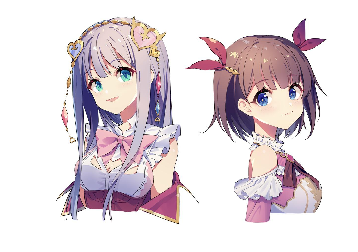

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 训练数据统计
train_names = os.listdir('PaddleGAN/data/animeSR/train')
print(f'训练集数据量: {len(train_names)}')

# 测试数据统计
test_names = os.listdir('PaddleGAN/data/animeSR/test')
print(f'测试集数据量: {len(test_names)}')

# 训练数据可视化
img_name = np.random.choice(train_names)
img = cv2.imread('PaddleGAN/data/animeSR/train/'+img_name)
img = img[:,:,::-1]
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

### 选择超分模型

PaddleGAN中提供的超分模型包括RealSR, ESRGAN, LESRCNN, DRN等，详情可见[超分模型](https://github.com/PaddlePaddle/PaddleGAN/blob/develop/docs/zh_CN/tutorials/super_resolution.md)。

接下来以ESRGAN为例进行演示。

### 修改配置文件
 所有模型的配置文件均在``` /home/aistudio/PaddleGAN/configs ```目录下。
 
 找到你需要的模型的配置文件，修改模型参数，一般修改迭代次数，num_workers，batch_size以及数据集路径。有能力的同学也可以尝试修改其他参数，或者基于现有模型进行二次开发，模型代码在``` /home/aistudio/PaddleGAN/ppgan/models ```目录下。
 
 以ESRGAN为例，这里将将配置文件``esrgan_psnr_x4_div2k.yaml``中的
 
 参数``total_iters``改为50000
 (为了节省时间，此处改为10000）
 
 参数``dataset：train：num_workers``改为12
 （为了避免shared memory报错，此处改为0）
 
 参数``dataset：train：batch_size``改为48
 （为了节省显存，此处改为16）
 
 参数``dataset：train：gt_folder``改为data/animeSR/train
 
 参数``dataset：train：lq_folder``改为data/animeSR/train_X4
 
 参数``dataset：test：gt_folder``改为data/animeSR/test
 
 参数``dataset：test：lq_folder``改为data/animeSR/test_X4
 

### 训练模型
以ESRGAN为例，运行以下代码训练ESRGAN模型。

如果希望使用其他模型训练，可以修改配置文件名字。

In [2]:
%cd /home/aistudio/PaddleGAN/
# !python -u tools/main.py --config-file configs/esrgan_psnr_x4_div2k.yaml
# !python -u tools/main.py --config-file configs/lesrcnn_psnr_x4_div2k.yaml
!python -u tools/main.py --config-file configs/esrgan_x4_div2k.yaml

### 测试模型
以ESRGAN为例，模型训练好后，运行以下代码测试ESRGAN模型。

其中``/home/aistudio/pretrained_model/ESRGAN_PSNR_50000_weight.pdparams``是刚才ESRGAN训练的模型参数，同学们需要换成自己的模型参数。

如果希望使用其他模型测试，可以修改配置文件名字。

In [3]:
%cd /home/aistudio/PaddleGAN/
# !python tools/main.py --config-file configs/esrgan_psnr_x4_div2k.yaml --evaluate-only --load /home/aistudio/PaddleGAN/output_dir/esrgan_psnr_x4_div2k-2021-04-20-15-08/iter_10000_weight.pdparams
# !python tools/main.py --config-file configs/lesrcnn_psnr_x4_div2k.yaml --evaluate-only --load /home/aistudio/PaddleGAN/output_dir/lesrcnn_psnr_x4_div2k-2021-04-20-17-59/iter_10000_weight.pdparams
!python tools/main.py --config-file configs/esrgan_x4_div2k.yaml --evaluate-only --load /home/aistudio/PaddleGAN/output_dir/esrgan_x4_div2k-2021-04-21-13-44/iter_10000_weight.pdparams

/home/aistudio/PaddleGAN
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[04/21 15:32:17] ppgan INFO: Configs: {'total_iters': 10000, 'output_dir': 'output_dir/esrgan_x4_div2k-2021-04-21-15-32', 'min_max': (0.0, 1.0), 'model': {'name': 'ESRGAN', 'generator': {'name': 'RRDBNet', 'in_nc': 3, 'out_nc': 3, 'nf': 64, 'nb': 23}, 'discriminator': {'name': 'VGGDiscriminator128', 'in_channels': 3, 'num_feat': 64}, 'pixel_criterion': {'name': 'L1Loss', 'loss_weight': 0.01}, 'perceptual_criterion': {'name': 'PerceptualLoss', 'layer_weights': {'34': 1.0}, 'perceptual_weight': 1.0, 'style_weight': 0.0, 'norm_img': False}, 'gan_criterion': {'name': 'GANLoss', 'gan_mode': 'vanilla', 'loss_weight': 0.005}}, 'dataset': {'train': {'name': 'SRDataset', 'gt_folder': 'data/animeSR/train', 'lq_folder': 'data/animeSR/train_X4', '

### 实验结果展示及模型下载
这里使用ESRGAN模型训练了一个基于PSNR指标的预测模型和一个基于GAN的预测模型。

数值结果展示及模型下载

| 方法 | 数据集 | 迭代次数 | 训练时长 | PSNR | SSIM | 模型下载 |
|---|---|---|---|---|---|---|
| ESRGAN_PSNR  | 卡通画超分数据集 | 10000 |  1小时16分钟6秒184毫秒 | 24.8896 | 0.7439 |[ESRGAN_PSNR](./pretrained_model/ESRGAN_PSNR10000_weight.pdparams)|
| LESRCNN_PSNR  | 卡通画超分数据集 | 10000 | 1小时2分钟50秒595毫秒 | 24.7941 | 0.7383 |[LESRCNN_PSNR](./pretrained_model/LESRCNN_PSNR10000_weight.pdparams)|
| ESRGAN_PerceptualLoss  | 卡通画超分数据集 | 10000 |  1小时44分钟54秒719毫秒 | 18.9877 | 0.5173 |[ESRGAN_PerceptualLoss](./pretrained_model/ESRGAN_PL10000_weight.rar)|

可视化
| 低分辨率 | ESRGAN_PSNR | LESRCNN_PSNR | ESRGAN_PerceptualLoss | GT |
|---|---|---|---|---|
|![](./image/Anime_411_lq.png)|![](./image/Anime_411_ESRGAN_PSNR10000.png)|![](./image/Anime_411_LESRCNN_PSNR10000.png)|![](./image/Anime_411_ESRGAN_PL10000.png)|![](./image/Anime_411_gt.png)|
|![](./image/Anime_405_lq.png)|![](./image/Anime_405_ESRGAN_PSNR10000.png)|![](./image/Anime_405_LESRCNN_PSNR10000.png)|![](./image/Anime_405_ESRGAN_PL10000.png)|![](./image/Anime_405_gt.png)|

